In [22]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
import tensorflow as tf

In [24]:
# GPU Status...
print(tf.config.experimental.list_physical_devices('GPU'))
print(tf.config.experimental.get_memory_info('GPU:0'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
{'current': 188417280, 'peak': 586978304}


In [25]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________
None


### Compile method

In [26]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

scc = tf.keras.metrics.SparseCategoricalCrossentropy()


model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy', # categorical_crossentropy
             metrics=[acc, mae, scc])

In [27]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.optimizer.lr)
print(model.metrics)

sparse_categorical_crossentropy
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
[]


# Fit method

### load the data

In [28]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [29]:
train_images.shape

(60000, 28, 28)

In [30]:
# define the labels
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']

In [31]:
print(train_labels[0])

9


In [32]:
train_images = train_images / 255.
test_images = test_images / 255.

In [33]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


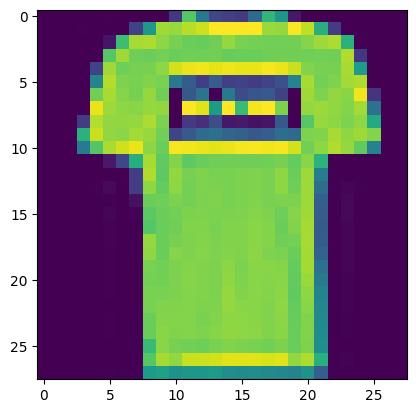

label: T-shirt/top


In [34]:
# display one of theimages
i = 1
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

In [35]:
# fit method
x=6
history = model.fit(train_images, train_labels, epochs=8, batch_size=256*x, verbose=2)


Epoch 1/8
40/40 - 1s - loss: 0.9621 - sparse_categorical_accuracy: 0.6808 - mean_absolute_error: 4.4200 - sparse_categorical_crossentropy: 0.9621 - 780ms/epoch - 19ms/step
Epoch 2/8
40/40 - 1s - loss: 0.5319 - sparse_categorical_accuracy: 0.8080 - mean_absolute_error: 4.4200 - sparse_categorical_crossentropy: 0.5319 - 598ms/epoch - 15ms/step
Epoch 3/8
40/40 - 1s - loss: 0.4601 - sparse_categorical_accuracy: 0.8383 - mean_absolute_error: 4.4200 - sparse_categorical_crossentropy: 0.4601 - 597ms/epoch - 15ms/step
Epoch 4/8
40/40 - 1s - loss: 0.4277 - sparse_categorical_accuracy: 0.8487 - mean_absolute_error: 4.4200 - sparse_categorical_crossentropy: 0.4277 - 595ms/epoch - 15ms/step
Epoch 5/8
40/40 - 1s - loss: 0.4039 - sparse_categorical_accuracy: 0.8590 - mean_absolute_error: 4.4200 - sparse_categorical_crossentropy: 0.4039 - 595ms/epoch - 15ms/step
Epoch 6/8
40/40 - 1s - loss: 0.3854 - sparse_categorical_accuracy: 0.8651 - mean_absolute_error: 4.4200 - sparse_categorical_crossentropy: 0

In [46]:
# plot training history
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error,sparse_categorical_crossentropy
0,0.247122,0.910200,4.420001,0.247122
1,0.240345,0.911300,4.420002,0.240345
2,0.237654,0.913733,4.420000,0.237654
3,0.234917,0.914450,4.420000,0.234917
4,0.233049,0.915383,4.419999,0.233049


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

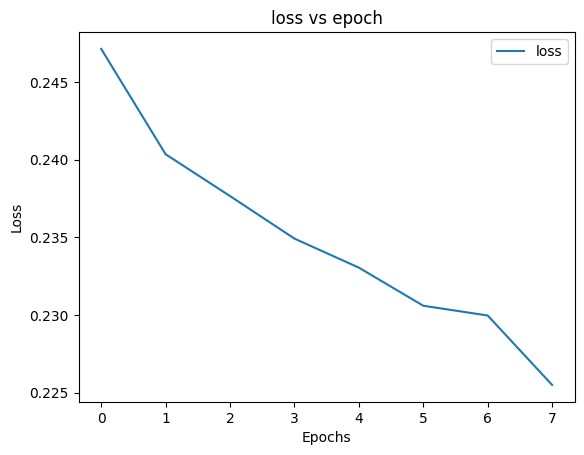

In [47]:
# make a plot of loss
loss_plot = df.plot(y='loss', title='loss vs epoch')
loss_plot.set(xlabel="Epochs", ylabel="Loss")

In [48]:
df.describe()

,loss,sparse_categorical_accuracy,mean_absolute_error,sparse_categorical_crossentropy
count,8.000000,8.000000,8.000000e+00,8.000000
mean,0.234894,0.914283,4.420000e+00,0.234894
std,0.006774,0.002542,9.343193e-07,0.006774
min,0.225502,0.910200,4.419999e+00,0.225502
25%,0.230440,0.913125,4.419999e+00,0.230440
50%,0.233983,0.914683,4.420000e+00,0.233983
75%,0.238327,0.915617,4.420000e+00,0.238327
max,0.247122,0.917967,4.420002e+00,0.247122


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'sparse_categorical_accuracy')]

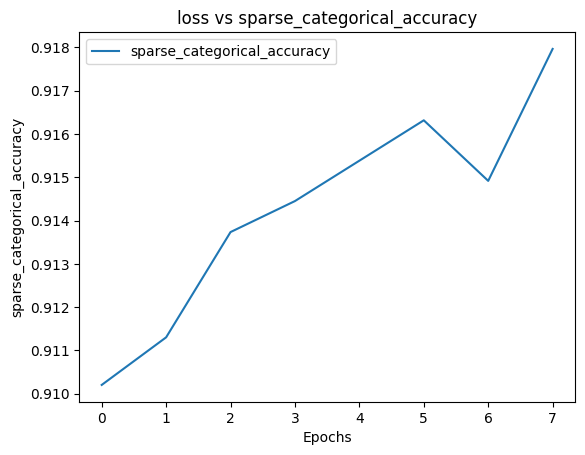

In [49]:
# plot accuracy
loss_plot = df.plot(y='sparse_categorical_accuracy', title='loss vs sparse_categorical_accuracy')
loss_plot.set(xlabel="Epochs", ylabel="sparse_categorical_accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'mean_absolute_error')]

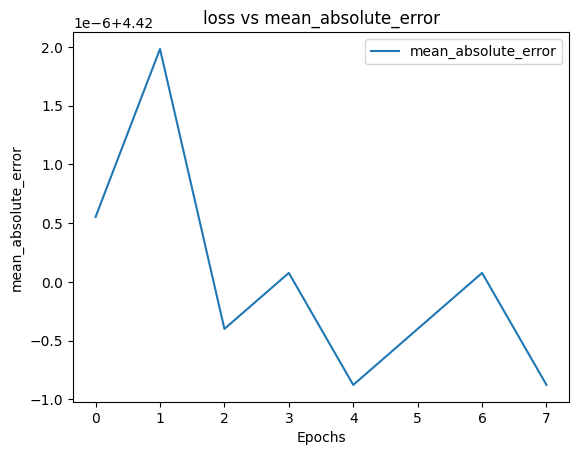

In [50]:
# plot for additional metric
loss_plot = df.plot(y='mean_absolute_error', title='loss vs mean_absolute_error')
loss_plot.set(xlabel="Epochs", ylabel="mean_absolute_error")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'sparse_categorical_crossentropy')]

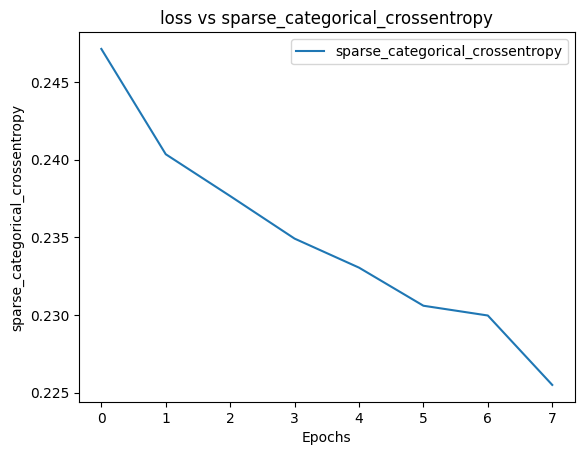

In [51]:

# plot for additional metric
loss_plot = df.plot(y='sparse_categorical_crossentropy', title='loss vs sparse_categorical_crossentropy')
loss_plot.set(xlabel="Epochs", ylabel="sparse_categorical_crossentropy")

# Evaluate

In [60]:
loss, accuracy, mae, scce = model.evaluate(test_images, test_labels, verbose=2)
print(loss, accuracy, mae, scce )

313/313 - 1s - loss: 0.3287 - sparse_categorical_accuracy: 0.8842 - mean_absolute_error: 4.4200 - sparse_categorical_crossentropy: 0.3287 - 513ms/epoch - 2ms/step
0.32866528630256653 0.8841999769210815 4.419997215270996 0.32866528630256653


# Predict

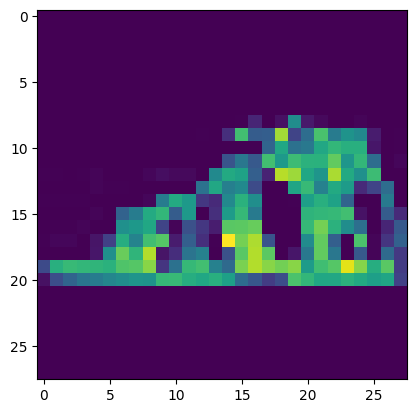

Label: Sandal


In [67]:
random_inx = np.random.choice(test_images.shape[0])
inx = 11

# show the image...
test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
print("Label: {}".format(labels[test_labels[inx]]))

In [70]:
model.predict(test_image[np.newaxis,...,np.newaxis])

1/1 [==============================] - 0s 174ms/step


array([[6.6890543e-06, 3.2811412e-10, 4.2246342e-05, 3.9702780e-05,
        1.1343053e-06, 9.8851192e-01, 6.1487031e-06, 1.1258427e-02,
        8.1906246e-06, 1.2559627e-04]], dtype=float32)

In [71]:
predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print("Model predictions: {}".format(labels[np.argmax(predictions)]))


1/1 [==============================] - 0s 14ms/step
Model predictions: Sandal
